<a href="https://colab.research.google.com/github/eyther18/Detection-of-Credit-Card-Frauds/blob/master/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection Using Different Machine Learning Algorithms

The objective of the project is to detect all the fraudulent transactions while minimizing incorrect fraud classification using various machine-learning techniques.

Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Library imports


In [90]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# Data Exploration

In [91]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [92]:
print('Dataset contains {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

Dataset contains 284807 rows and 31 columns.


In [93]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146084,87426.0,-1.411512,1.067355,1.409569,4.292509,0.430227,2.831664,-0.748377,0.944136,-0.633843,1.940432,-0.985189,-1.851693,-2.613686,0.381404,2.129284,-1.032479,1.392070,-1.042910,-0.422861,-0.408872,0.391356,1.241586,0.252731,-1.528922,-1.117990,0.486644,-0.861374,0.089722,0.00,0
129190,78988.0,-3.250299,2.947622,0.088573,-0.448851,-1.022202,-0.834105,0.031359,0.758654,1.238424,2.301419,0.055077,0.237387,-0.353710,0.023747,1.223213,-0.201050,0.170737,-0.963867,-0.739422,0.998653,-0.412791,-0.653364,0.207393,0.334329,0.148656,0.085056,0.654459,0.382209,11.99,0
236714,148925.0,2.054881,0.453226,-2.634175,1.331050,1.304640,-0.568705,0.653888,-0.276544,0.213971,-0.357824,-1.215589,-0.366693,-0.447608,-0.977570,-0.240973,-0.010407,0.766954,0.296619,-0.171569,-0.196733,-0.080392,-0.061635,-0.084156,-0.105856,0.559433,-0.479577,-0.006255,-0.027668,20.01,0
20205,30858.0,1.195735,-0.107186,0.630827,0.865208,-0.802026,-0.681207,-0.207076,-0.006454,0.777335,-0.167236,-0.928545,-0.378551,-1.662469,0.212617,0.042883,-0.107457,0.091642,-0.521386,0.227633,-0.195718,-0.309484,-0.833923,0.085298,0.370699,0.276823,0.184382,-0.028547,0.015999,19.99,0
47160,43106.0,1.225505,-0.112753,-0.322741,0.540467,-0.076070,-0.542485,0.205918,-0.148953,0.423339,-0.099578,-1.534476,-0.687054,-1.285453,0.425136,0.273169,-0.012629,-0.238446,-0.180518,0.436190,-0.068371,-0.103673,-0.334348,-0.246808,-0.414898,0.709035,0.604709,-0.073539,-0.000345,60.00,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [96]:
data.isnull().values.any()

False

In [97]:
count_classes = pd.value_counts(data['Class'], sort = True)

print(count_classes)

0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

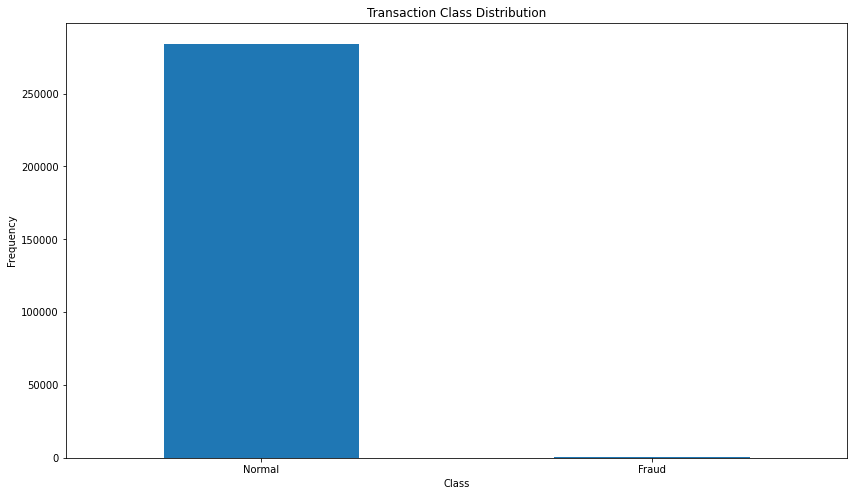

In [98]:
count_classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), LABELS)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")


In [99]:
fraud  = data[data['Class']==1]

normal = data[data['Class'] == 0]

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [100]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Let us take a look at the distribution of 'Time' and 'Amount' features, as they are the only non PCA transformed features

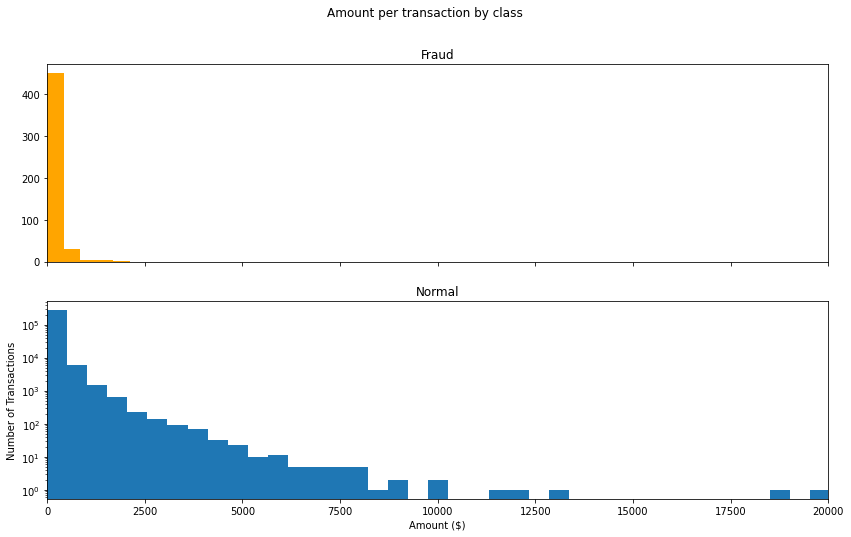

In [101]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = 5,color="Orange")
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

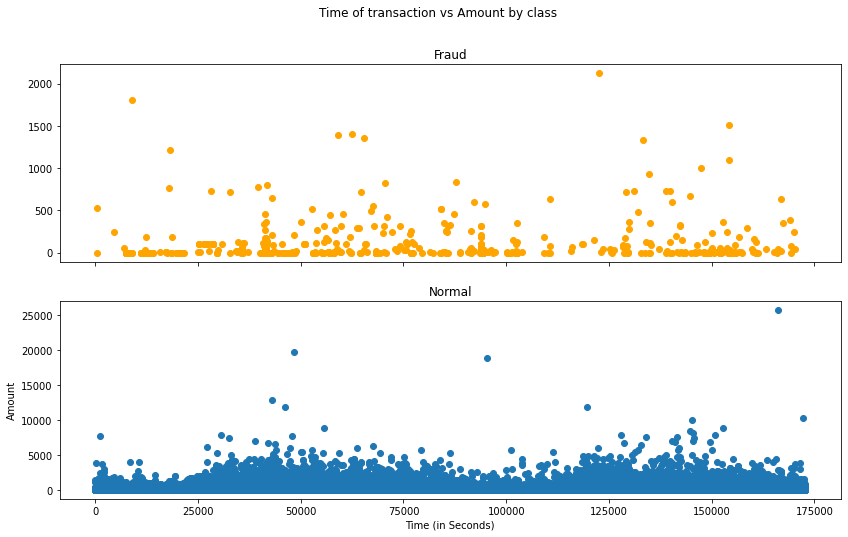

In [102]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color='Orange')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

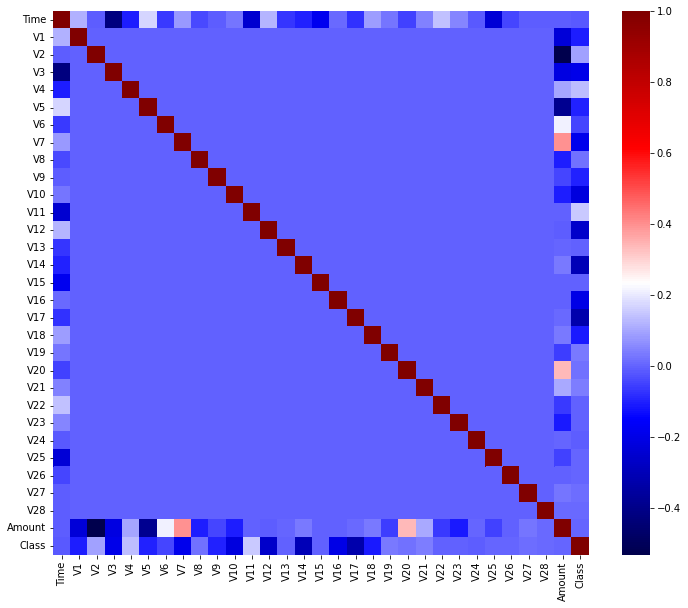

In [103]:
#finding correlation between columns and plotting heatmap

plt.figure(figsize=(12,10))
g=sns.heatmap(data.corr(),annot=False,cmap="seismic")

# Data Cleaning

## *Feature Scaling*


Anonymised features appear to have been scaled and centred around zero but Amount and Time have not been scaled. For algorithms to perform well, the features have to be scaled.

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [105]:
#scaling Time feature

scaled_time = scaler.fit_transform(data[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]    # making a flat list out of a list of lists
scaled_time = pd.Series(flat_list1)

In [106]:
#scaling Amount feature

scaled_amount = scaler2.fit_transform(data[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [107]:
# adding the scaled features and dropping the unscaled features from the original dataframe

df = pd.concat([data, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
169821,0.913111,-2.552846,-1.448484,-0.566347,-0.988475,0.250747,-0.041555,0.000331,1.289934,-0.481919,0.610878,0.823804,0.046159,0.274447,0.698706,0.621111,-0.865025,0.815139,0.286955,1.056432,0.549769,0.364480,-0.356424,0.315107,-0.526624,0.623546,-0.155603,0.040702,0,2.005641,0.527736
76466,1.381661,-0.618881,-0.053698,-0.980531,-0.844745,-0.918268,-0.298442,-0.290564,-0.875675,0.625458,-0.880720,-0.257904,0.556834,0.076570,0.900922,-1.165658,-0.156373,0.932832,-0.464393,-0.351952,-0.409335,-0.773375,-0.035807,-0.057294,0.250214,1.447498,-0.101640,0.000846,0,-0.164160,-0.805084
44363,-0.657453,0.725382,1.324574,1.041091,0.146513,-1.104720,0.786052,-0.152287,-0.611499,-0.048245,-0.161305,0.196896,0.351720,0.276701,0.970245,-0.444282,-0.090328,-0.018803,0.263527,0.352090,0.193689,0.555980,0.062793,0.728613,-0.188934,-0.340462,0.389848,0.240440,0,-0.117462,-1.113940
119876,-1.064812,0.631247,2.019779,0.282431,0.655525,-0.113485,0.562620,0.268815,-0.564069,-0.687274,1.036166,0.689475,-0.915065,0.246144,-1.305710,-0.433726,-0.079778,-0.381322,-0.608420,-0.142382,0.028052,0.078701,-0.308416,0.206745,0.605004,-0.419640,0.041608,0.053174,0,-0.349231,-0.404246
275174,-1.713437,1.992477,-1.282566,-0.826902,-0.414038,-0.709109,-0.225639,1.313910,-0.174464,0.008252,0.054034,1.107444,-0.043045,1.073849,-1.069899,0.480132,-0.256911,-0.118963,0.179061,0.021643,-0.196031,-0.633477,0.190692,-0.491007,-0.266904,0.171153,0.187619,0.072414,0,-0.317487,1.507603


## *Data splitting*

The dataset is now split into training set and testing set for further processes.

In [108]:
from sklearn.model_selection import train_test_split;
X = data.iloc[:,:-1]
Y= data['Class']


X_pretrain, X_test, Y_pretrain, Y_test = train_test_split(X, Y, test_size = 0.35)

print("Train and test sizes, respectively:", len(X_pretrain), len(Y_pretrain), "|", len(X_test), len(Y_test))

print("Total number of frauds:", len(Y.loc[data['Class'] == 1]), len(Y.loc[data['Class'] == 1])/len(Y))

print("Number of frauds on y_test:", len(Y_test.loc[data['Class'] == 1]), len(Y_test.loc[data['Class'] == 1]) / len(Y_test))

print("Number of frauds on y_pretrain:", len(Y_pretrain.loc[data['Class'] == 1]), len(Y_pretrain.loc[data['Class'] == 1])/len(Y_pretrain))

Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 171 0.0017154379382642978
Number of frauds on y_pretrain: 321 0.0017339729046476956


## *SMOTE oversampling*

The present dataset is highly imbalanced with the fraud cases forming an extremely small percentage ( < 1% ) of the whole. This poses a problem in training the algorithms. To deal with this problem, the technique of SMOTE oversampling is used.

In [109]:
from imblearn.over_sampling import SMOTE
X_train, Y_train = SMOTE().fit_resample(X_pretrain, Y_pretrain)

Text(0, 0.5, 'Frequency')

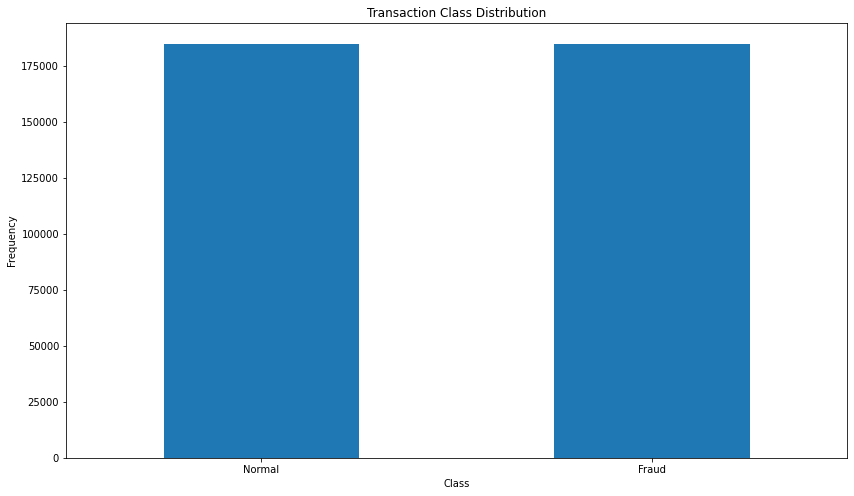

In [110]:
pd.value_counts(Y_train, sort = True).plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Model Training

## 1. Simple Logistic Regression

In [111]:
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix

In [112]:
logistic = linear_model.LogisticRegression(max_iter = 500)
logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [113]:
Y_predicted = np.array(logistic.predict(X_test))
Y_right = np.array(Y_test)
g = confusion_matrix(Y_right,Y_predicted)
g

array([[97342,  2170],
       [   18,   153]])

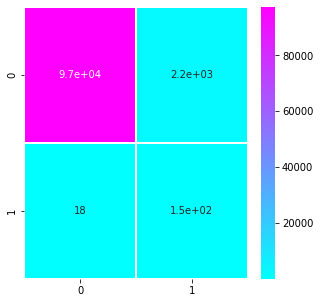

In [114]:
plt.figure(figsize=(5,5))
sns.heatmap(g,linewidths=.5,annot=True,cmap="cool")

In [115]:
false_pos = g[0][1]

false_neg = g[1][0]

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)

print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(X_test))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))


Accuracy: 0.9780504198308638
False negative rate (with respect to misclassifications):  0.008226691042047532
False negative rate (with respect to all the data):  0.00018057241455413662
False negatives, false positives, mispredictions: 18 2170 2188
Total test data points: 99683


## 2. K NN

In [116]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [117]:
X_scaled = scale(X)

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X_scaled)

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_reduced, Y, test_size = 0.33, random_state=500)

In [118]:
kmeans = KMeans(init = 'k-means++', n_clusters=2,n_init=10)

kmeans.fit(X_train2)

KMeans(n_clusters=2)

In [119]:
Y_predicted2 = np.array(kmeans.predict(X_test2))

Y_right2 = np.array(Y_test2)

g2 = confusion_matrix(Y_right2, Y_predicted2)

g2

array([[42289, 51532],
       [   58,   108]])

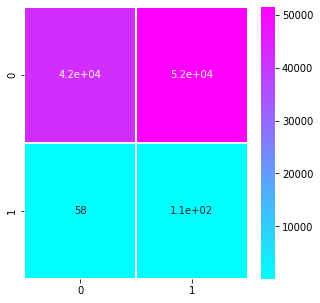

In [120]:
plt.figure(figsize=(5,5))

sns.heatmap(g2,linewidths=.5,annot=True,cmap="cool")

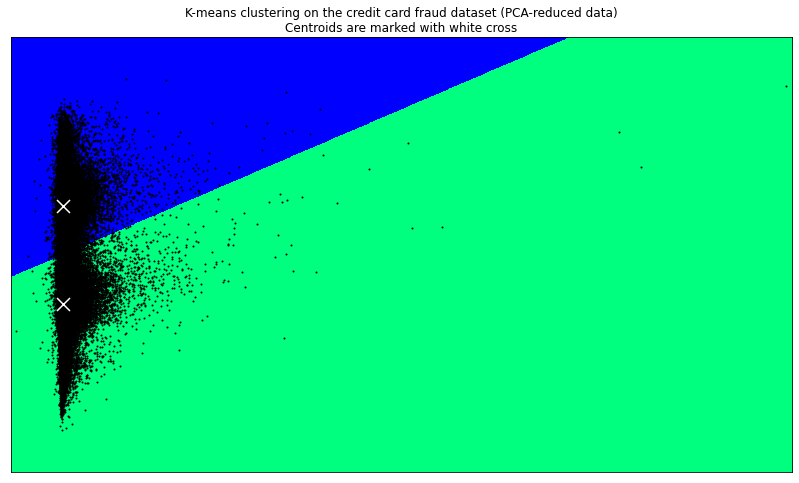

In [121]:
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap="winter",
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [122]:
false_pos = g2[0][1]

false_neg = g2[1][0]

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test2) - (false_neg + false_pos)) / len(X_test2)

print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(X_test2))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test2))

Accuracy: 0.45109430027557
False negative rate (with respect to misclassifications):  0.0011242488854429154
False negative rate (with respect to all the data):  0.000617106621128454
False negatives, false positives, mispredictions: 58 51532 51590
Total test data points: 93987


## 3. Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
random_forest = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [125]:
Y_predicted3 = np.array(random_forest.predict(X_test))

Y_right3 = np.array(Y_test)

g3 = confusion_matrix(Y_right3, Y_predicted3)

g3

array([[99295,   217],
       [   18,   153]])

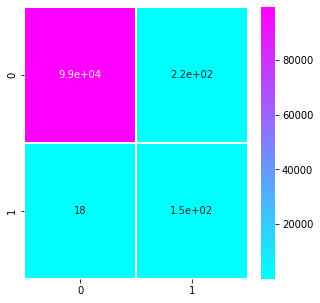

In [126]:
plt.figure(figsize=(5,5))

sns.heatmap(g3,linewidths=.5,annot=True,cmap="cool")

In [127]:
false_pos = g3[0][1]

false_neg = g3[1][0]

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)

print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(X_test))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.9976425268099877
False negative rate (with respect to misclassifications):  0.07659574468085106
False negative rate (with respect to all the data):  0.00018057241455413662
False negatives, false positives, mispredictions: 18 217 235
Total test data points: 99683


## 4. SVM

In [128]:
from sklearn.svm import LinearSVC

In [129]:
svc_model = LinearSVC()
svc_model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [130]:
Y_predicted5 = np.array(svc_model.predict(X_test))

Y_right5 = np.array(Y_test)

g5 = confusion_matrix(Y_right5, Y_predicted5)

g5

array([[96974,  2538],
       [   28,   143]])

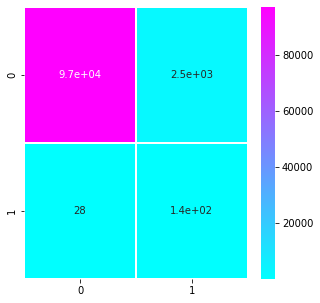

In [131]:
plt.figure(figsize=(5,5))

sns.heatmap(g5,linewidths=.5,annot=True,cmap="cool")

In [132]:
false_pos = g5[0][1]

false_neg = g5[1][0]

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)

print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(X_test))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.9742583991252269
False negative rate (with respect to misclassifications):  0.010911925175370226
False negative rate (with respect to all the data):  0.0002808904226397681
False negatives, false positives, mispredictions: 28 2538 2566
Total test data points: 99683


# Conclusion

Based on the accuracy score Random Forest outperformed all the other algorithms with an accuracy of 99.76%. Worst amongst them was KNN with an accuracy of 45.10%. But accuracy is not the correct representation in the real world scenario. The better comparision feature would be False Negative Rate. False Negative here means fraud was commited with it wasn't detected (hence False Negatives should be low). In case of 
Random Forest both the misclassifications and false negatives were significantly low. Hence, Random Forest can be considered as the best amongst all of them. 

We can work on tuning the hyperparameters of Random Forest using Grid Search to get even better results.